# Kaggle Titanic Competition

Load packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

Read data

In [2]:
df_train  = pd.read_csv('../raw_data/train.csv')
df_test   = pd.read_csv('../raw_data/test.csv')
df_submit = pd.read_csv('../raw_data/gender_submission.csv')

## Kaggle Titanic Tutorial
https://www.kaggle.com/alexisbcook/titanic-tutorial

In [30]:
# percentage of women who survived
women = df_train.loc[df_train.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)

print('percentage of women who survived:', round(rate_women*100, 2), '%')

percentage of women who survived: 74.2 %


In [31]:
# percentage of men who survived
men = df_train.loc[df_train.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)

print('percentage of men who survived:', round(rate_men*100, 2), '%')

percentage of men who survived: 18.89 %


In [5]:
# random forest model
y = df_train['Survived']

features = ['Pclass', 'Sex', 'SibSp', 'Parch']
X = pd.get_dummies(df_train[features])
X_test = pd.get_dummies(df_test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId' : df_test.PassengerId, 'Survived': predictions})
output.to_csv('../clean_data/submission.csv', index =False)
print('Your submission was successfully saved!')

Your submission was successfully saved!


End tutorial

### Data Analysis

In [4]:
# number of rows and columns
df_train.shape

(891, 12)

In [5]:
# column information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 5 first entries
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# summary statistics
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# percentage of surivors
perc_survivors = round((df_train['Survived'].sum()/df_train['PassengerId'].count()*100), 2)
print(perc_survivors, '% of registered passengers survived')

# percentage embarked
perc_embarked

38.38 % of registered passengers survived


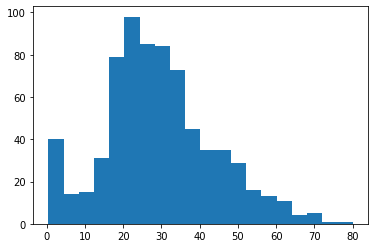

In [14]:
plt.hist(df_train['Age'],
         histtype = 'barstacked',
         bins = 20)
plt.show()

In [20]:
perc_embarked = df_train.groupby(['Embarked']).count()
perc_embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
C,168,168,168,168,168,130,168,168,168,168,69
Q,77,77,77,77,77,28,77,77,77,77,4
S,644,644,644,644,644,554,644,644,644,644,129


Text(0.5, 1.0, 'Missing values heatmap')

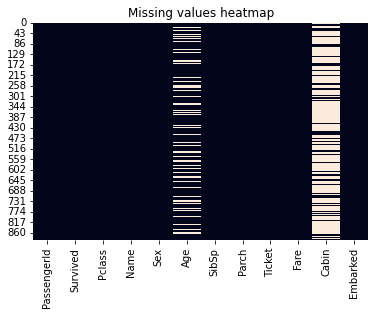

In [21]:
# missing values
# df_train.isnull().sum()

sns.heatmap(df_train.isnull(), cbar = False).set_title("Missing values heatmap")